In [36]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json   #Provide rights for your colab to communicate with kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Data Source: Fitbit Fitness Tracker Data

In [37]:
# Downloads the Fitbit dataset from Kaggle using the Kaggle API
! kaggle datasets download -d arashnic/fitbit

Dataset URL: https://www.kaggle.com/datasets/arashnic/fitbit
License(s): CC0-1.0
fitbit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [39]:
# Load the CSV files
daily_act = pd.read_csv('/content/dailyActivity_merged.csv')
sleep = pd.read_csv('/content/sleepDay_merged.csv')
hourly_steps = pd.read_csv('/content/hourlySteps_merged.csv')

In [40]:
# Display Information About The Data Frame
daily_act.info()
sleep.info()
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [41]:
# Display the first few rows of the daily_act DataFrame to inspect its data structure and content
daily_act.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [42]:
# Calculate the TotalAciveMinute and TotalActiveHours
daily_act['TotalMinutes'] = daily_act['VeryActiveMinutes'] + daily_act['FairlyActiveMinutes'] + daily_act['LightlyActiveMinutes']
daily_act['TotalHours'] = round(daily_act['TotalMinutes'] / 60)

# Create a new column 'DayOfWeek' by extracting the day name from 'ActivityDate'
daily_act['ActivityDate'] = pd.to_datetime(daily_act['ActivityDate'])
daily_act.ActivityDate.dtypes
daily_act['DayOfWeek'] = daily_act.ActivityDate.dt.day_name()
df = daily_act.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance'],axis=1)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours,DayOfWeek
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,6.0,Tuesday
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,4.0,Wednesday
2,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,4.0,Thursday
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,5.0,Friday
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,4.0,Saturday


In [43]:
# Create a new column 'DayOfWeek' by extracting the day name from 'SleepDay'
sleep.SleepDay = pd.to_datetime(sleep.SleepDay)
sleep.SleepDay.dtypes
sleep['DayOfWeek'] = sleep.SleepDay.dt.day_name()
sleep.head()

<ipython-input-43-a76865b063b2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep.SleepDay = pd.to_datetime(sleep.SleepDay)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [44]:
hourly_steps.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [45]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553,3.775532
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000,2.000000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000,4.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000,5.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000,9.000000
std,2.424805e+09,NaN,5087.150742,3.924606,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307,2.057646


In [46]:
sleep.describe()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
mean,5.000979e+09,2016-04-26 12:40:05.811137792,1.118644,419.467312,458.639225
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.000000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,433.000000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060360e+09,NaN,0.345521,118.344679,127.101607


In [47]:
hourly_steps.describe()

,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


In [48]:
# Count the number of unique values in the 'Id' column of the daily_act DataFrame
daily_act['Id'].nunique()

33

In [49]:
# Calculate the daily average for each user
daily_average = df.groupby('Id').agg(mean_daily_steps=('TotalSteps', 'mean')).reset_index()
print(daily_average.head())

           Id  mean_daily_steps
0  1503960366      12116.741935
1  1624580081       5743.903226
2  1644430081       7282.966667
3  1844505072       2580.064516
4  1927972279        916.129032


In [50]:
# Classify users based on daily steps
conditions = [
    (daily_average['mean_daily_steps'] < 5000),
    (daily_average['mean_daily_steps'] >= 5000) & (daily_average['mean_daily_steps'] < 7500),
    (daily_average['mean_daily_steps'] >= 7500) & (daily_average['mean_daily_steps'] < 10000),
    (daily_average['mean_daily_steps'] >= 10000)
]
choices = ['sedentary', 'lightly active', 'fairly active', 'very active']
daily_average['user_type'] = np.select(conditions, choices, default='unknown')
print(daily_average.head())

           Id  mean_daily_steps       user_type
0  1503960366      12116.741935     very active
1  1624580081       5743.903226  lightly active
2  1644430081       7282.966667  lightly active
3  1844505072       2580.064516       sedentary
4  1927972279        916.129032       sedentary


In [51]:
# Percentage of each user type
user_type_percent = daily_average['user_type'].value_counts(normalize=True).reset_index()
user_type_percent.columns = ['user_type', 'total_percent']
user_type_percent['labels'] = user_type_percent['total_percent'].apply(lambda x: f"{x:.2%}")
user_type_percent['user_type'] = pd.Categorical(user_type_percent['user_type'],
                                                categories=["very active", "fairly active", "lightly active", "sedentary"],
                                                ordered=True)
print(user_type_percent.head())

        user_type  total_percent  labels
0  lightly active       0.272727  27.27%
1   fairly active       0.272727  27.27%
2       sedentary       0.242424  24.24%
3     very active       0.212121  21.21%


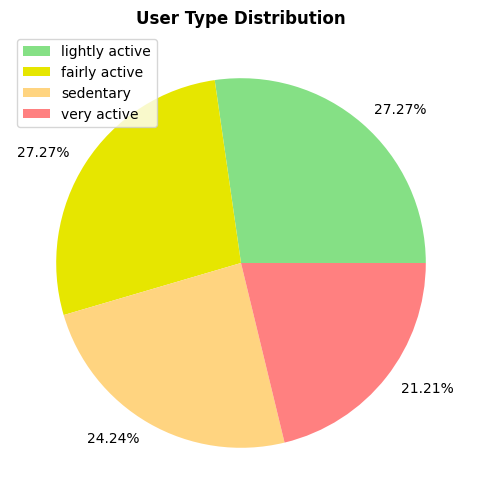

In [52]:
# Plotting the user type distribution as a pie chart
plt.figure(figsize=(6, 6))
colors = ["#85e085", "#e6e600", "#ffd480", "#ff8080"]
plt.pie(user_type_percent['total_percent'], labels=user_type_percent['labels'], colors=colors)
plt.legend(user_type_percent['user_type'], loc='upper left')
plt.title('User Type Distribution',fontweight='bold')
plt.show()



*   Fitbit's user base shows a balanced mix with "lightly active" and "fairly
active" users each at 27.27%, "sedentary" at 24.24%, and "very active" at 21.21%.

*   To promote more physical activity, Fitbit could provide educational content on exercise benefits, practical tips for integrating movement into daily routines, and tailored workout routines.

*   Targeting sedentary users with beginner-friendly activities and encouraging lightly active users to increase their activity levels could foster healthier habits.








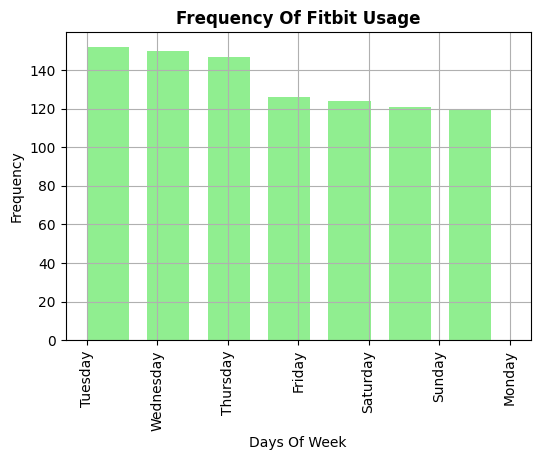

In [53]:
# Plotting the Frequency Of Fitbit usage as Histogram
plt.figure(figsize=(6,4))
plt.hist(df['DayOfWeek'], bins=7, color='lightgreen', width = 0.6)
plt.xticks(rotation = 90)
plt.grid()
plt.title("Frequency Of Fitbit Usage", fontweight='bold')
plt.xlabel('Days Of Week')
plt.ylabel('Frequency')
plt.show()



*   Fitbit usage is higher during the middle of the week (Tuesday to Thursday) and tends to drop as the weekend approaches and on Monday.

*   This pattern might indicate a higher level of physical activity or health monitoring during the weekdays compared to the weekends.



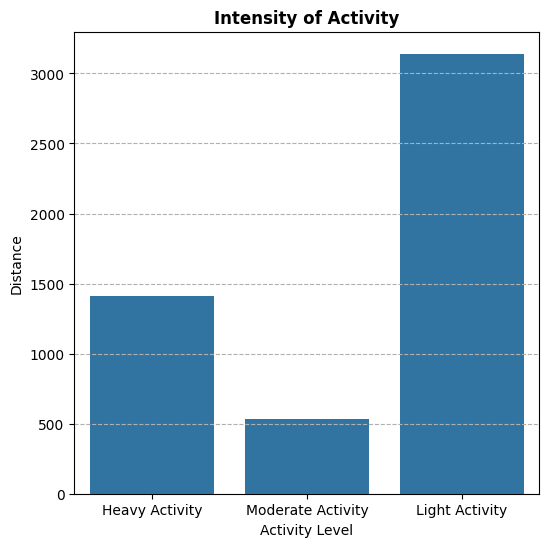

In [54]:
# Plotting Bar chart of Intensity of Activity Level
act_level = df[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum().reset_index()
act_level.columns = ['activities', 'value']
activity_labels = {
    'VeryActiveDistance': 'Heavy Activity',
    'ModeratelyActiveDistance': 'Moderate Activity',
    'LightActiveDistance': 'Light Activity'
}
act_level['activities'] = act_level['activities'].map(activity_labels)
plt.figure(figsize=(6, 6))
sns.barplot(data=act_level, x='activities', y='value')
plt.title('Intensity of Activity',fontweight='bold')
plt.xlabel('Activity Level')
plt.ylabel('Distance')
plt.grid(True, axis='y', linestyle='--')
plt.show()



*   It can be inferred that users tend to engage more in low-intensity (light) activities and less in moderate-intensity activities.

*   Heavy intensity activities are more common than moderate intensity but still not as prevalent as light activities




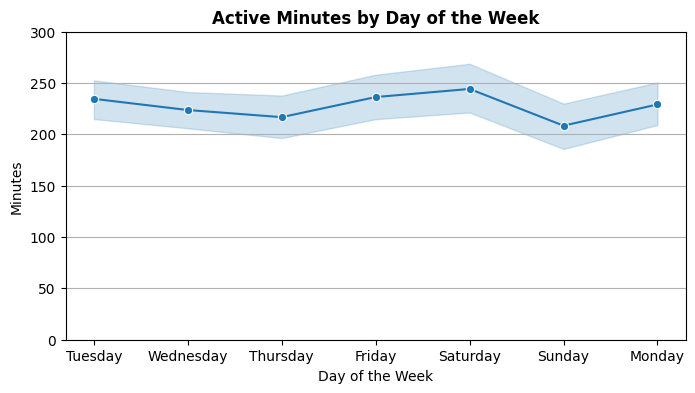

In [55]:
# Plotting Lineplot of Active Minutes by Day of the Week
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='DayOfWeek', y='TotalMinutes', marker = 'o')
plt.ylim(0,300)
plt.title('Active Minutes by Day of the Week', fontweight = 'bold')
plt.xlabel('Day of the Week')
plt.ylabel('Minutes')
plt.grid(axis='y')
plt.show()



*   The line plot shows that users are most active towards weekend particularly on Friday and Saturday, logging around 250 minutes. This trend suggests that people might have more free time or motivation to engage in physical activities.

*   The drop in activity on Sunday could be due to it being a rest day for many users, leading to fewer active minutes.

*   The rise in activity on Monday might indicate a return to routine and a renewed effort to start the week on a positive, active note.



<ipython-input-56-13998faa0d4f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])


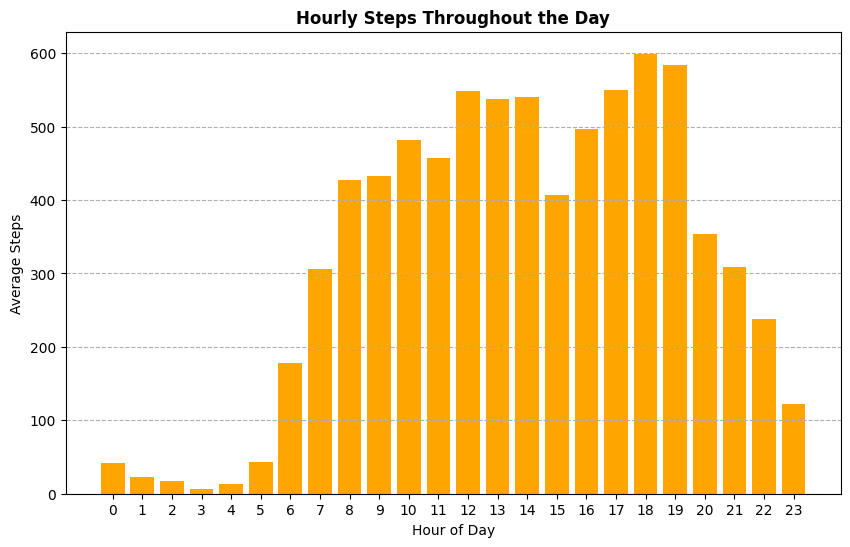

In [56]:
# Plotting Bar Chart on Hourly Steps Throughout the Day
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour
hourly_step = hourly_steps.groupby('Hour')['StepTotal'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_step['Hour'], hourly_step['StepTotal'], color='orange')

plt.title('Hourly Steps Throughout the Day',fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Average Steps')
plt.xticks(hourly_step['Hour'])
plt.grid(axis='y', linestyle='--')
plt.show()



*   The bar chart of hourly steps shows peak activity between 5 PM and 7 PM, likely due to users going to the gym or for walks after work.

*   Activity increases from 7 AM and drops after 8 PM, indicating less activity in early mornings and late evenings.

*   Fitbit can leverage this by sending motivational reminders during peak times and encouraging short walks or light activities during less active hours to promote balanced daily activity.



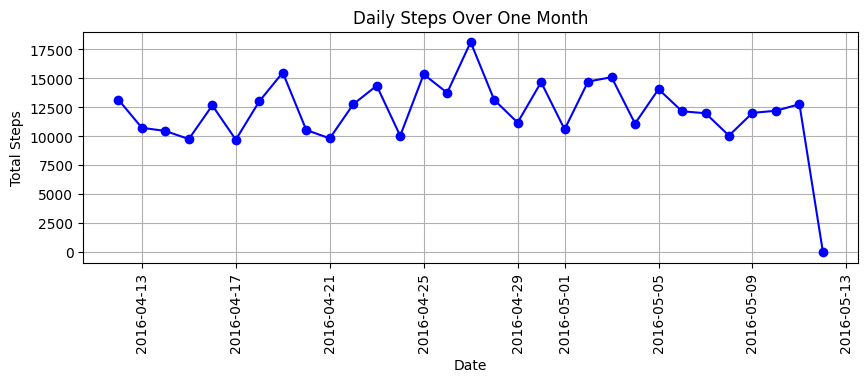

In [57]:
# Plotting lineplot on Trends of Daily Steps over a Month of Single user
data = df[df['Id']==1503960366]
plt.figure(figsize=(10, 3))
plt.plot(data['ActivityDate'], data['TotalSteps'], marker='o', linestyle='-', color='b')
plt.title('Daily Steps Over One Month')
plt.xlabel('Date')
plt.ylabel('Total Steps')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



*   The user's highest recorded step count is around 17,500, with consistent daily steps between 10,000 and 15,000 indicating consisent activity level.

*   This consistence is  likely to be supported by Fitbit's daily step target feature.

*   Irregular peaks indicate high-activity days driven by specific goals or challenges.The significant drop at the end suggests an potential disruption in routine.

*   Fitbit's target-setting and motivational features help maintain this consistent activity level.



<Axes: >

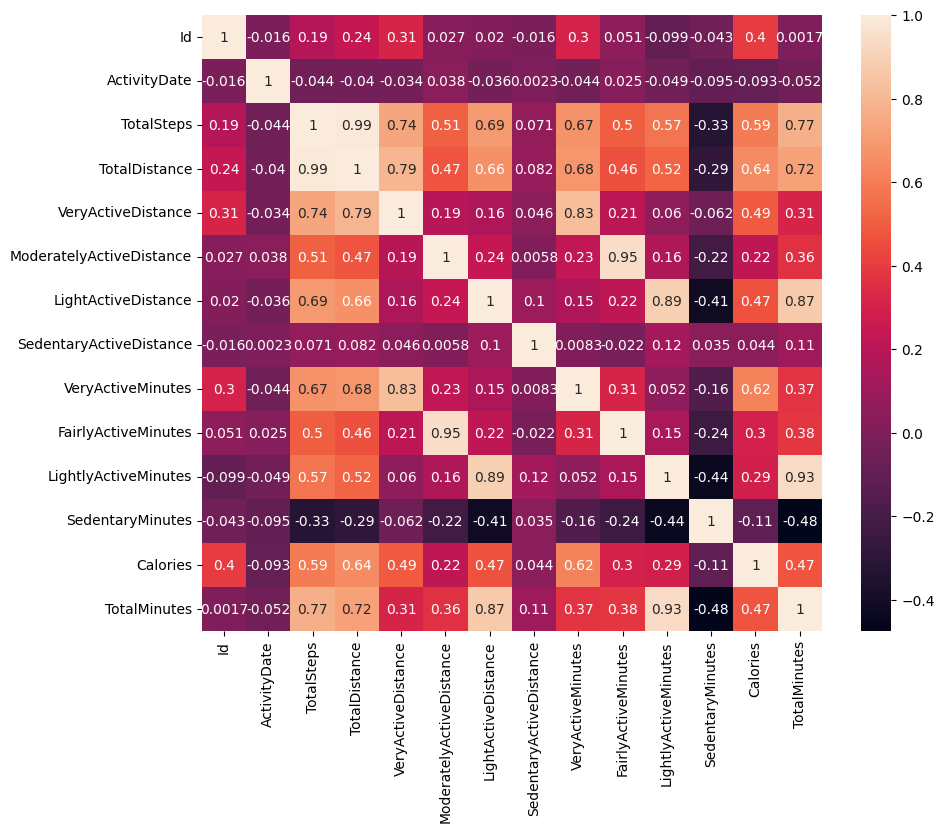

In [58]:
# Heatmap showing correlation between different parameters
plt.figure(figsize=(10,8))
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
correlation = df[numerical_columns].corr()
correlation = correlation.drop('TotalHours', axis=0).drop('TotalHours', axis=1)
sns.heatmap(correlation, annot=True)



*  From the heat map we can say that Totalsteps and total distance are highly correlated followed by ModeratelyActiveDistance and FairlyActive Minutes.

*   we can also see that sendentary Minutes and TotalActive MInutes are least correlated

*   From the heatmap we can notice that the TotalSteps and VeryActiveMintues Columns have the highest influence on the Calories column which is essential factor for weightloss



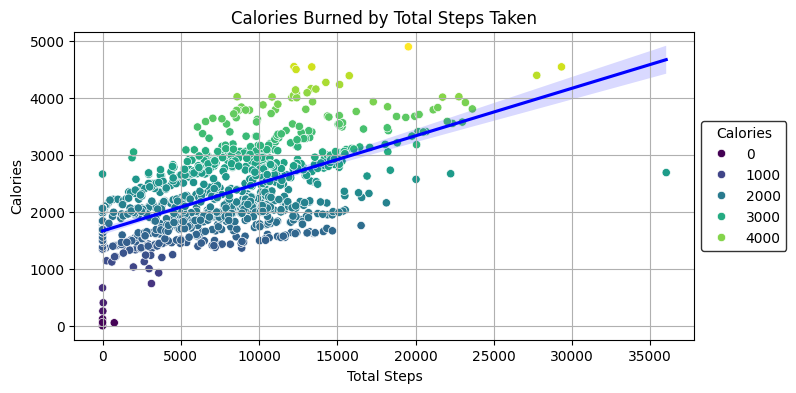

In [59]:
# Plotting Scatter plot to show the correlation between Carories Burned by Total Steps Taken
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='TotalSteps', y='Calories', hue='Calories', palette='viridis')
sns.regplot(data=df, x='TotalSteps', y='Calories', scatter=False, color='blue')

plt.title('Calories Burned by Total Steps Taken')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.legend(title='Calories', loc='upper right')
plt.grid(True)
plt.legend(title = 'Calories', loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, edgecolor='black')
plt.show()
#There is a clear positive correlation between these two variables: the more steps taken in a day, the more calories burned.



*  The scatter plot shows a positive correlation between steps taken and calories burned, with more steps leading to higher caloric expenditure.

*    Most users burn between 1000 and 3000 calories for 5000 to 20,000 steps.


*   The linear trend and color gradient indicate that increasing steps consistently results in more calories burned.


*    This visual emphasizes the strong relationship between physical activity and energy expenditure.

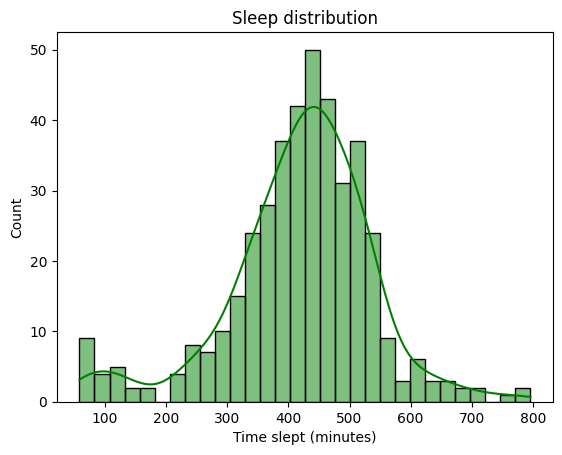

In [60]:
# Plotting histogram of sleep distribution of users
sns.histplot(sleep['TotalMinutesAsleep'], bins=30, kde=True, color= 'green', edgecolor='black')
plt.xlabel('Time slept (minutes)')
plt.ylabel('Count')
plt.title('Sleep distribution')
plt.show()



*   In this graph, we can see the user's average minutes of sleep, following a normal distribution.

*  A majority of users sleep approximately 320 to 530 minutes. ie, 5.5 to 7.5 hours.

*   The distribution is roughly normal, with a few instances of very short or very long sleep durations.

*   This suggests that the majority of users are achieving a typical night's sleep, though there is some variability on either end.





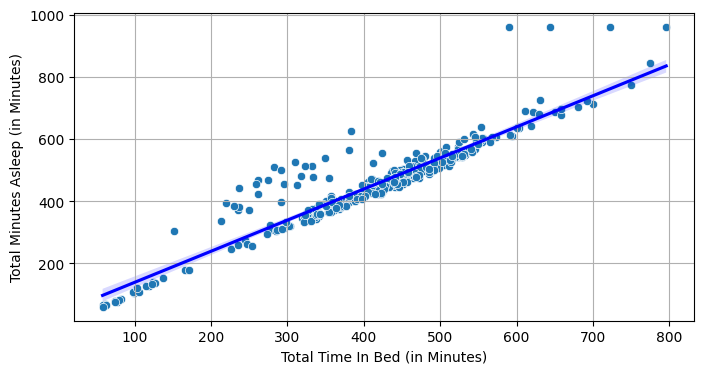

In [61]:
# Plotting the Scatter plot to show the correlation between Time in Bed VS Time Asleep
plt.figure(figsize=(8, 4))
sns.scatterplot(data=sleep, x='TotalMinutesAsleep', y='TotalTimeInBed')
sns.regplot(data=sleep, x='TotalMinutesAsleep', y='TotalTimeInBed', scatter=False, color='blue')

plt.title('')
plt.xlabel('Total Time In Bed (in Minutes)')
plt.ylabel('Total Minutes Asleep (in Minutes)')
plt.grid(True)
plt.show()



*  The correlation between TotalMinutesAsleep and Total Time in Bed suggests that most users primarily use their time in bed for sleep.

*  Fitbit could implement personalized notifications to encourage users who spend excessive time on devices to prioritize sleep

*   Conversely, for individuals spending prolonged periods in bed during waking hours, Fitbit could provide motivational reminders to promote healthy, active habits.


<ipython-input-62-58dc335f643d>:22: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(daily_use_percent['usage'], title="Usage Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=[


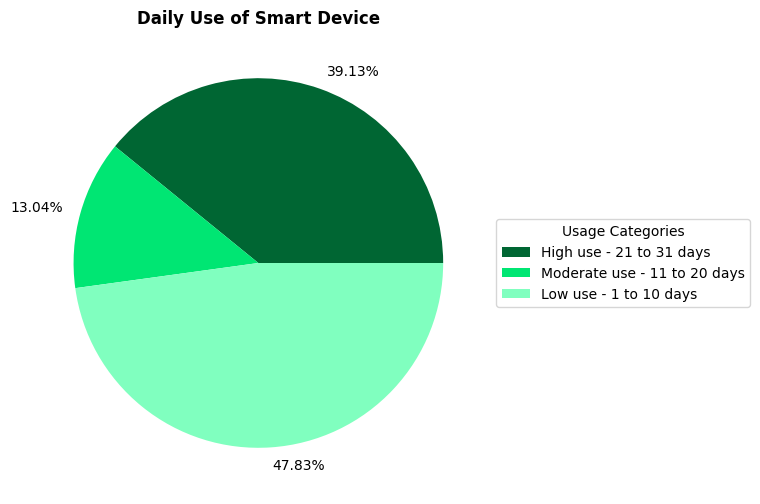

In [62]:
# Categorize 'days_used' into bins representing low, moderate, and high usage categories
daily_use = sleep.groupby('Id').size().reset_index(name='days_used')
daily_use['usage'] = pd.cut(
    daily_use['days_used'],
    bins=[0, 10, 20, 31],
    labels=["low use", "moderate use", "high use"],
    right=True
)

# Calculate the percentage distribution of devices in each usage category.
daily_use_percent = daily_use.groupby('usage').size().reset_index(name='total')
daily_use_percent['total_percent'] = daily_use_percent['total'] / daily_use_percent['total'].sum()
daily_use_percent['labels'] = (daily_use_percent['total_percent'] * 100).round(2).astype(str) + '%'
daily_use_percent['usage'] = pd.Categorical(daily_use_percent['usage'], categories=["high use", "moderate use", "low use"])

# Plot a pie chart to visualize the distribution of usage categories
plt.figure(figsize=(6, 6))
colors = ["#006633", "#00e673", "#80ffbf"]
plt.pie(daily_use_percent['total_percent'], labels=daily_use_percent['labels'], colors=colors)

# Add a legend with custom labels describing each usage category.
plt.legend(daily_use_percent['usage'], title="Usage Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labels=[
    "High use - 21 to 31 days",
    "Moderate use - 11 to 20 days",
    "Low use - 1 to 10 days"
])
plt.title('Daily Use of Smart Device', fontweight='bold')
plt.show()




*  To enhance usage, Fitbit could introduce personalized challenges and rewards tailored to individual activity levels.  

*   Implementing reminders and goal-setting features could also help users stay motivated and consistently engage with their device.

*   Additionally, enhancing the user experience through intuitive interfaces and interactive features may encourage prolonged and consistent usage of Fitbit devices.




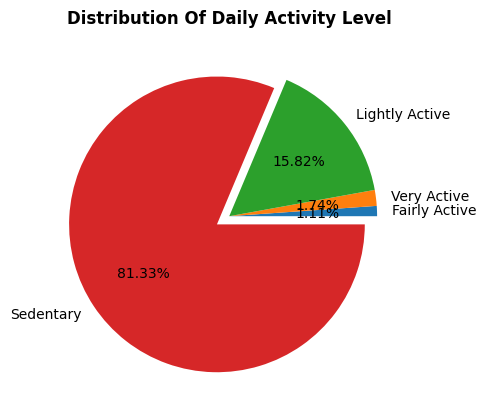

In [63]:
# Calculate the total minutes spent in each activity level category.
FairlyActiveMinutes = df['FairlyActiveMinutes'].sum()
VeryActiveMinutes = df['VeryActiveMinutes'].sum()
LightlyActiveMinutes = df['LightlyActiveMinutes'].sum()
SedentaryMinutes = df['SedentaryMinutes'].sum()

# Plot a pie chart to visualize the distribution of daily activity levels.
minuts = [FairlyActiveMinutes,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
label = ['Fairly Active','Very Active','Lightly Active','Sedentary']

plt.pie(minuts,labels=label,autopct='%1.2f%%',explode=[0,0,0,0.1])
plt.title('Distribution Of Daily Activity Level',fontweight='bold')
plt.show()



*  This data suggests that a significant portion, approximately 81%, of users utilize the program primarily for tracking calories burned during typical daily activities.  

*   However, there is an opportunity for Fitbit to incentivize and encourage users to engage in more active lifestyles through tailored challenges, rewards, and personalized activity goals.

*   By leveraging these strategies, Fitbit can support users in achieving their fitness and wellness objectives while promoting sustained engagement with the platform.

